In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import warnings
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder,FunctionTransformer
from sklearn.datasets import load_breast_cancer

warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
data=load_breast_cancer()
df=pd.DataFrame(data=data.data,columns=data.feature_names)
df['target'] = data.target

In [9]:
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothn

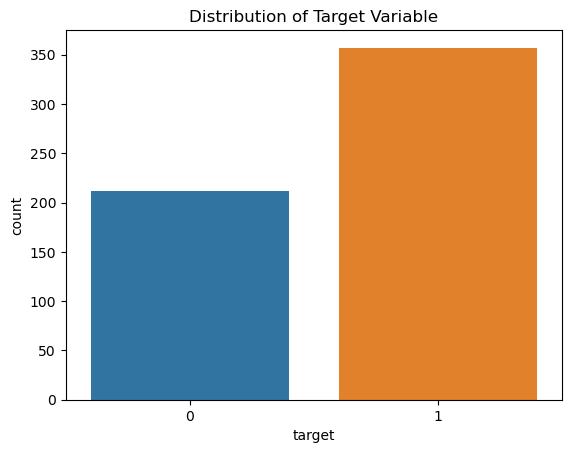

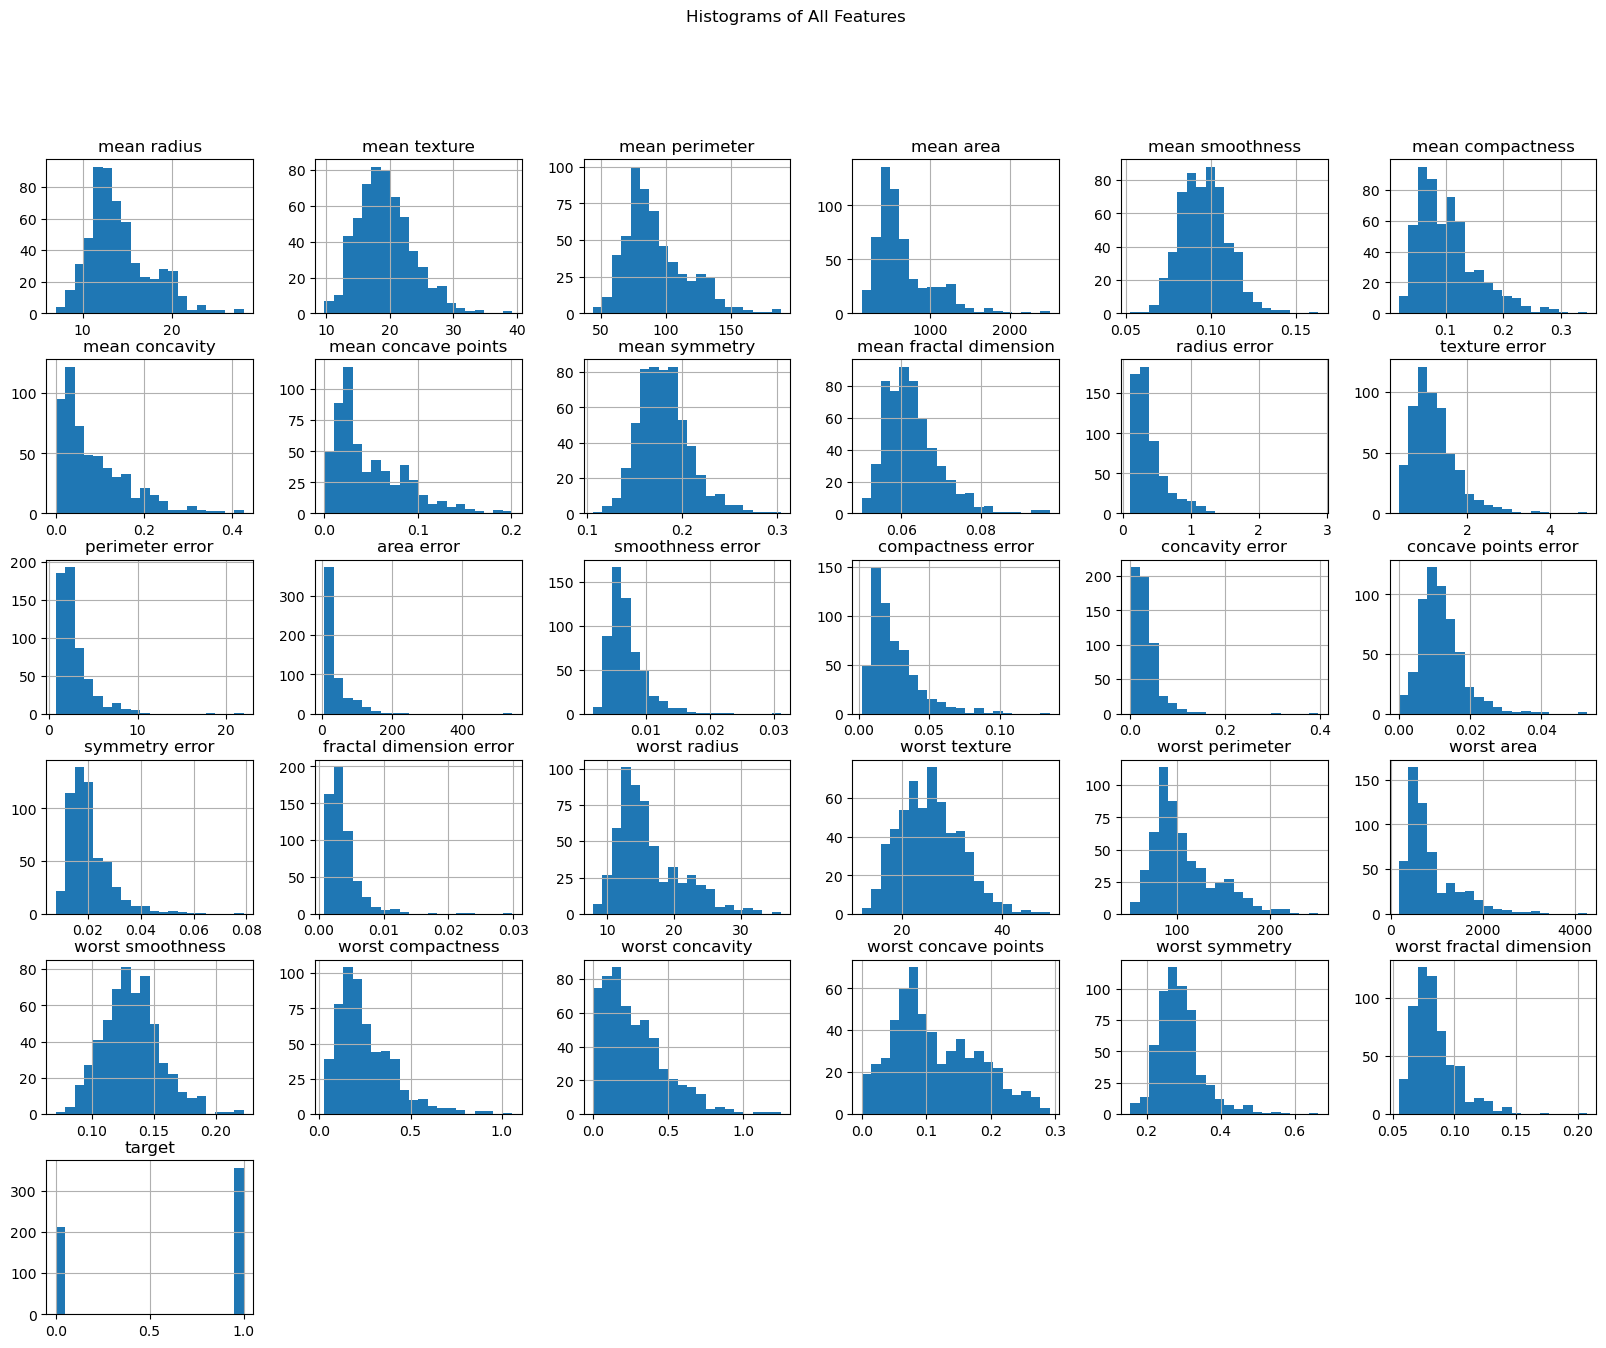

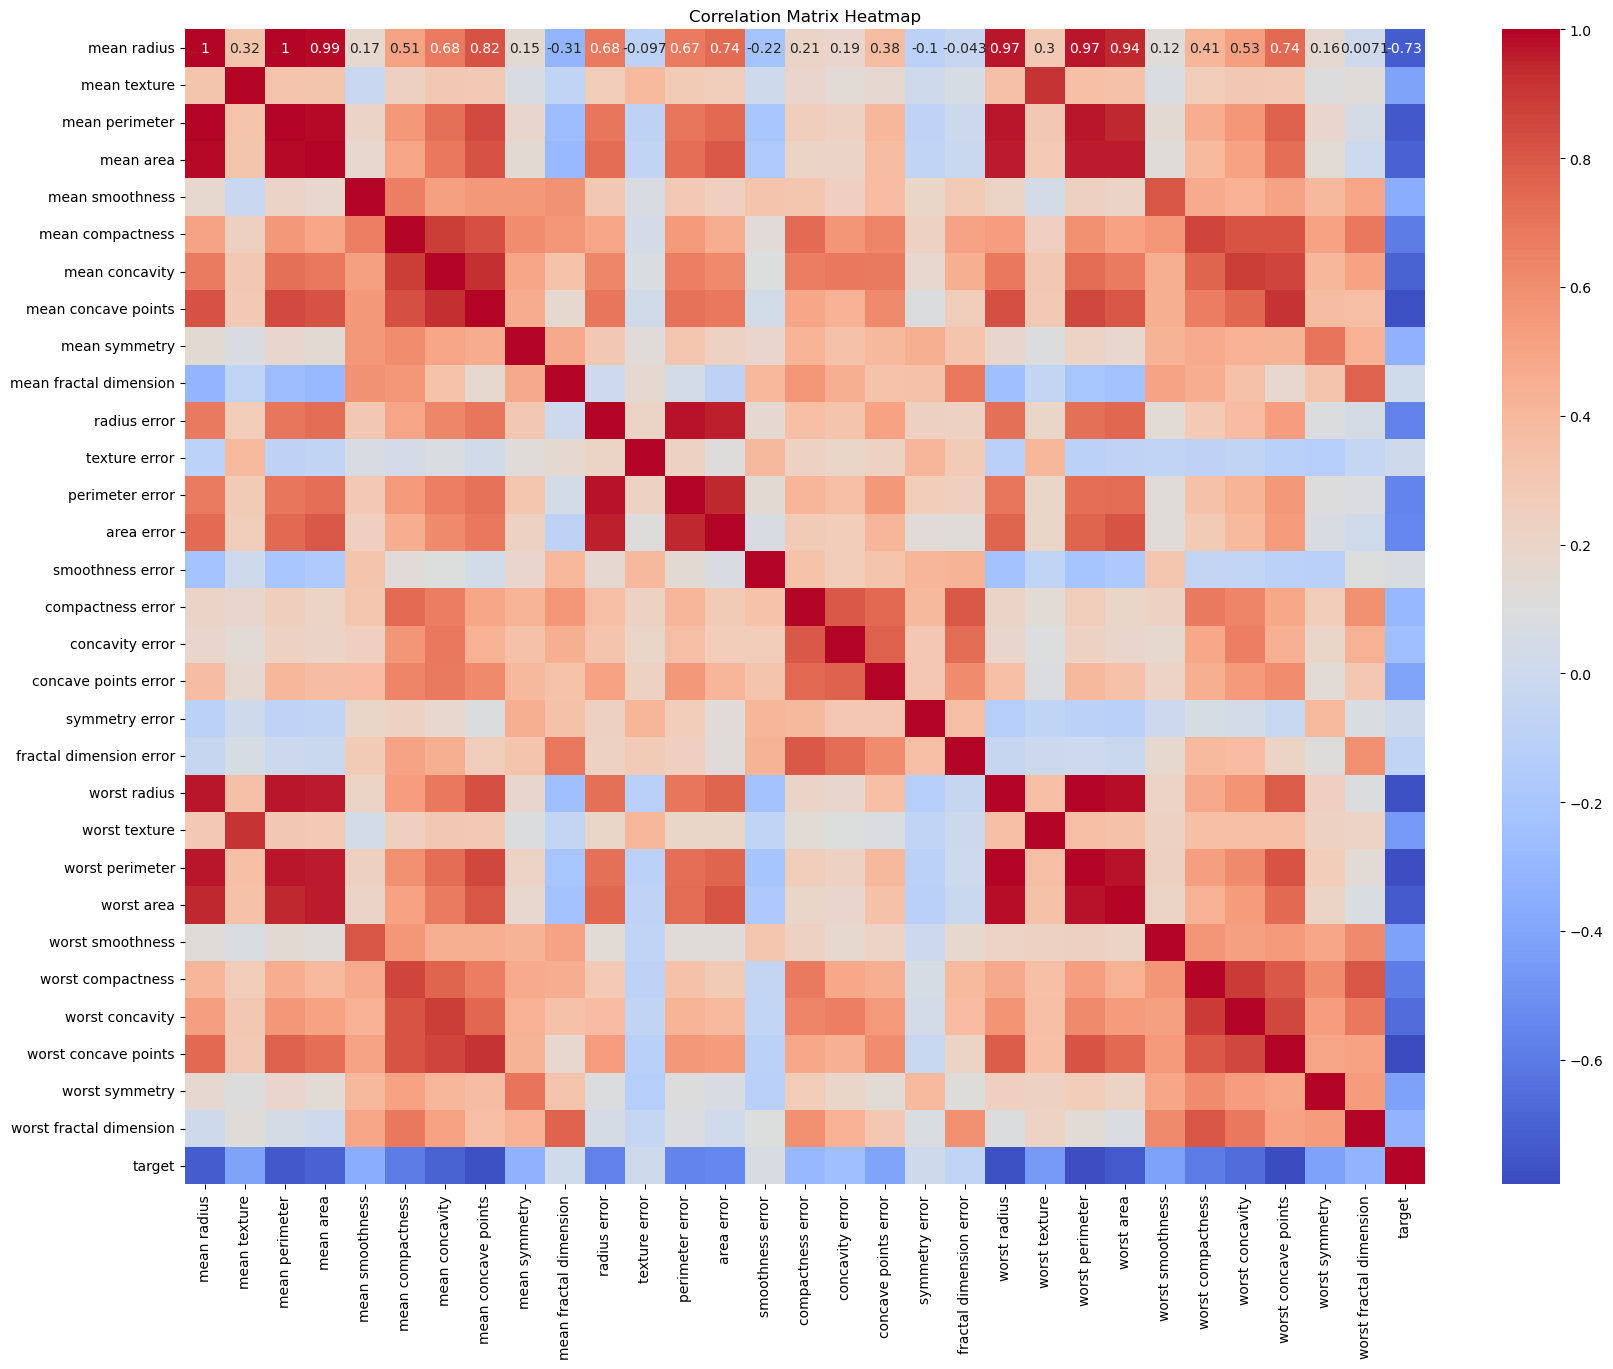

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the DataFrame
print("Basic Information:")
print(df.info())

# Display descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Distribution of target variable
print("\nDistribution of Target Variable:")
print(df['target'].value_counts())

# Plot distribution of target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

# Histograms of all features
df.hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of All Features')
plt.show()

# Correlation matrix
corr_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [11]:
df.corr()

mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -0.097317      0.386358       -0.086761  -0.066280   
perimeter error             0.674172      0.281673        0.693135   0.726628   
area error                  0.735864      0.259845        0.744983   0.800086   
smoothness error           -0.222600      0.006614       -0.202694  -0.166777   
compactness error           0.206000      0.191975        0.250744   0.212583   
concavity error             0.194204      0.143293        0.228082   0.207660   
concave points error        0.376169      0.163851        0.407217   0.372320   
symmetry error             -0.104321      0.009127       -0.081629  -0.072497   
fractal dimension error    -0.042641      0.054458       -0.005523  -0.019887   
worst radius                0.969539      0.352573        0.969476   0.962746   
worst texture               0.297008      0.912045        0.303038   0.287489   
worst perimeter             0.965137      0.358040        0.970387   0.959120   
worst area                  0.941082      0.343546        0.941550   0.959213   
worst smoothness            0.119616      0.077503        0.150549   0.123523   
worst compactness           0.413463      0.277830        0.455774   0.390410   
worst concavity             0.526911      0.301025        0.563879   0.512606   
worst concave points        0.744214      0.295316        0.771241   0.722017   
worst symmetry              0.163953      0.105008        0.189115   0.143570   
worst fractal dimension     0.007066      0.119205        0.051019   0.003738   
target                     -0.730029     -0.415185       -0.742636  -0.708984   

                         mean smoothness  mean compactness  mean concavity  \
mean radius                     0.170581          0.506124        0.676764   
mean texture                   -0.023389          0.236702        0.302418   
mean perimeter                  0.207278          0.556936        0.716136   
mean area                       0.177028          0.498502        0.685983   
mean smoothness                 1.000000          0.659123        0.521984   
mean compactness                0.659123          1.000000        0.883121   
mean concavity                  0.521984          0.883121        1.000000   
mean concave points             0.553695          0.831135        0.921391   
mean symmetry                   0.557775          0.602641        0.500667   
mean fractal dimension          0.584792          0.565369        0.336783   
radius error                    0.301467          0.497473        0.631925   
texture error                   0.068406          0.046205        0.076218   
perimeter error                 0.296092          0.548905        0.660391   
area error                      0.246552          0.455653        0.617427   
smoothness error                0.332375          0.135299        0.098564   
compactness error               0.318943          0.738722        0.670279   
concavity error                 0.248396          0.570517        0.691270   
concave points error        

In [12]:
#Pandas Profiling
from ydata_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
num_col=df.columns[df.dtypes!='object']

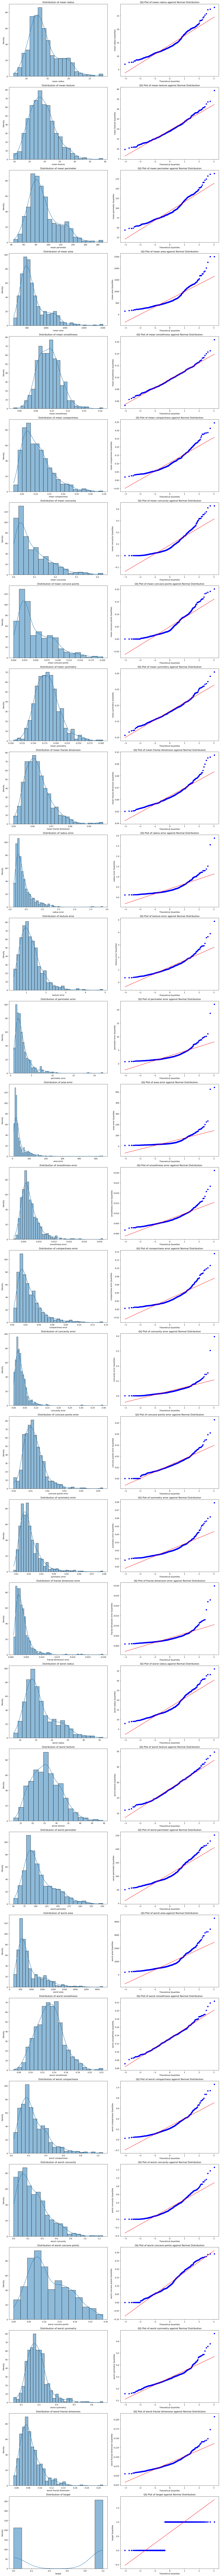

In [14]:
ig, axes = plt.subplots(nrows=len(num_col), ncols=2, figsize=(16, len(num_col) * 6))

for idx, col in enumerate(num_col):
    sns.histplot(data=df, x=col, kde=True, ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Distribution of {col}')
    axes[idx, 0].set_xlabel(col)
    axes[idx, 0].set_ylabel('Density')
    
    stats.probplot(df[col], dist="norm", plot=axes[idx, 1])
    axes[idx, 1].set_title(f'QQ Plot of {col} against Normal Distribution')
    axes[idx, 1].set_xlabel('Theoretical Quantiles')
    axes[idx, 1].set_ylabel(f'{col} Quantiles')

plt.tight_layout()
plt.show()

In [ ]:
#worst_smoothness,worst_texture,mean_textre-->mean Imputation
#rest-->median Imputation

In [15]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Z-Score method
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    outliers = np.where(z_scores > threshold)
    return outliers

# IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return outliers

# Isolation Forest method
def detect_outliers_isolation_forest(data):
    iso_forest = IsolationForest(contamination=0.1)
    outliers = iso_forest.fit_predict(data)
    return outliers

# Local Outlier Factor method
def detect_outliers_lof(data):
    lof = LocalOutlierFactor()
    outliers = lof.fit_predict(data)
    return outliers

# Z-Score method detection
outliers_zscore = df.apply(lambda x: detect_outliers_zscore(x) if np.issubdtype(x.dtype, np.number) else x)

# IQR method detection
outliers_iqr = df.apply(lambda x: detect_outliers_iqr(x) if np.issubdtype(x.dtype, np.number) else x)

# Isolation Forest detection
outliers_isolation_forest = detect_outliers_isolation_forest(df.iloc[:, :-1])

# Local Outlier Factor detection
outliers_lof = detect_outliers_lof(df.iloc[:, :-1])

print("Outliers detected using Z-Score method:")
print(outliers_zscore)

print("\nOutliers detected using IQR method:")
print(outliers_iqr)

print("\nOutliers detected using Isolation Forest method:")
print(outliers_isolation_forest)

print("\nOutliers detected using LOF method:")
print(outliers_lof)


Outliers detected using Z-Score method:
                mean radius          mean texture  \
0  [82, 180, 212, 352, 461]  [219, 232, 239, 259]   

                       mean perimeter  \
0  [82, 122, 180, 212, 352, 461, 521]   

                                 mean area          mean smoothness  \
0  [82, 122, 180, 212, 339, 352, 461, 521]  [3, 105, 122, 504, 568]   

                          mean compactness  \
0  [0, 3, 78, 82, 108, 122, 181, 258, 567]   

                                mean concavity            mean concave points  \
0  [78, 82, 108, 122, 152, 202, 352, 461, 567]  [82, 108, 122, 180, 352, 461]   

            mean symmetry            mean fractal dimension  ...  \
0  [25, 60, 78, 122, 146]  [3, 71, 152, 318, 376, 504, 505]  ...   

          worst texture                worst perimeter  \
0  [219, 239, 259, 265]  [82, 180, 265, 352, 461, 503]   

                                          worst area worst smoothness  \
0  [23, 180, 236, 265, 339, 352, 368, 461, 5

In [16]:
from sklearn.ensemble import IsolationForest

# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outliers = iso_forest.fit_predict(df.iloc[:, :-1])

# Filter out the outliers
# The outliers array contains -1 for outliers and 1 for inliers
new_df = df[outliers == 1]

# Display the shape of the original and cleaned DataFrames
print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing outliers: {new_df.shape}")

# Display the first few rows of the cleaned DataFrame
print(new_df.head())


Original DataFrame shape: (569, 31)
DataFrame shape after removing outliers: (512, 31)
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
4           0.13280          0.1980              0.10430         0.1809   
5           0.17000          0.1578              0.08089         0.2087   
6           0.10900          0.1127              0.07400         0.1794   

   me

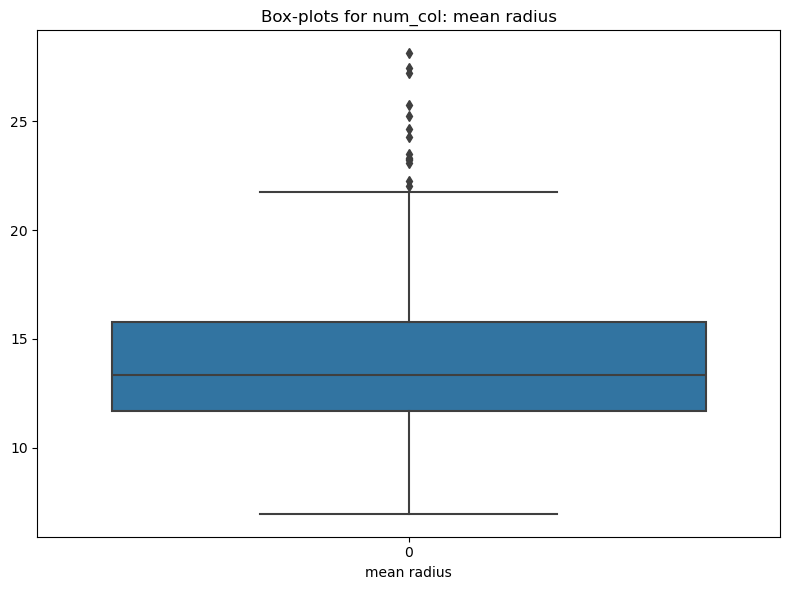

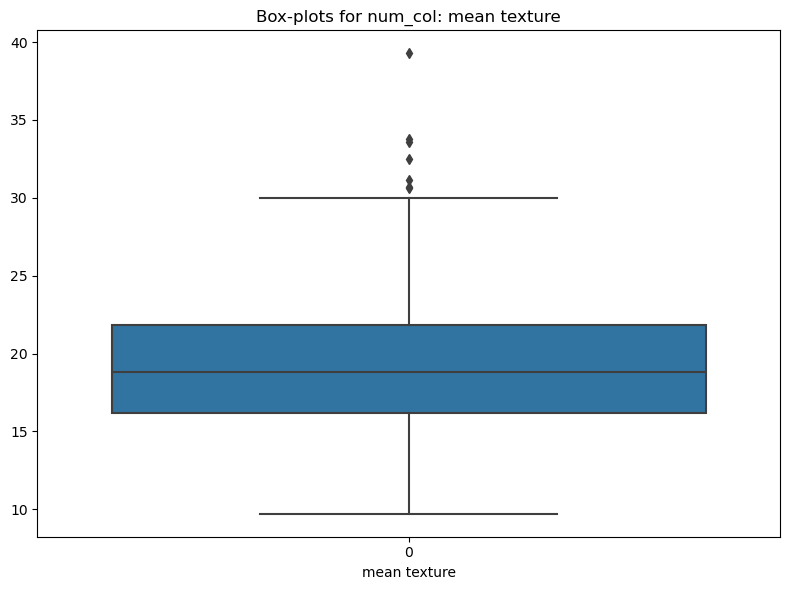

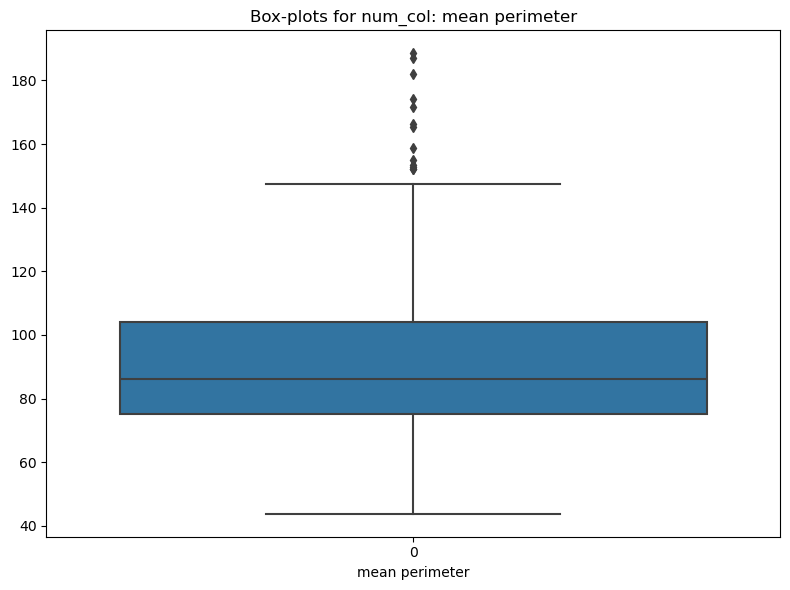

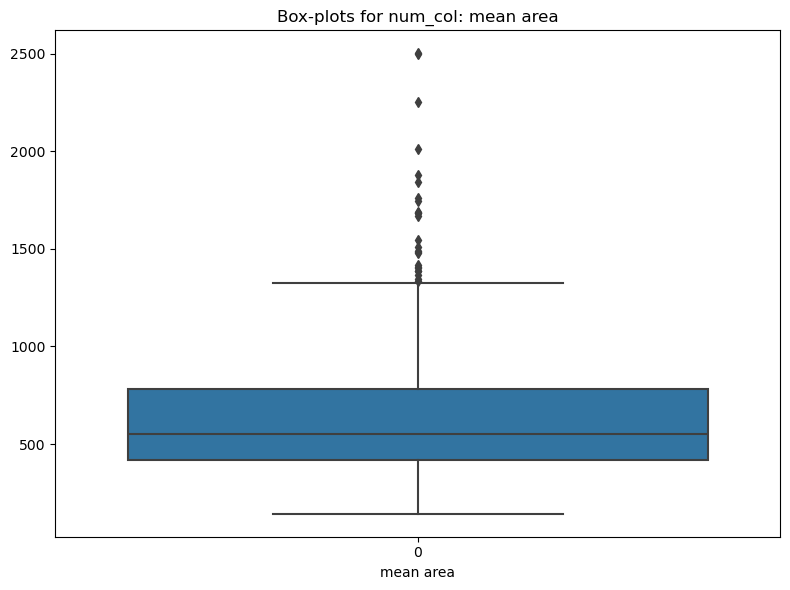

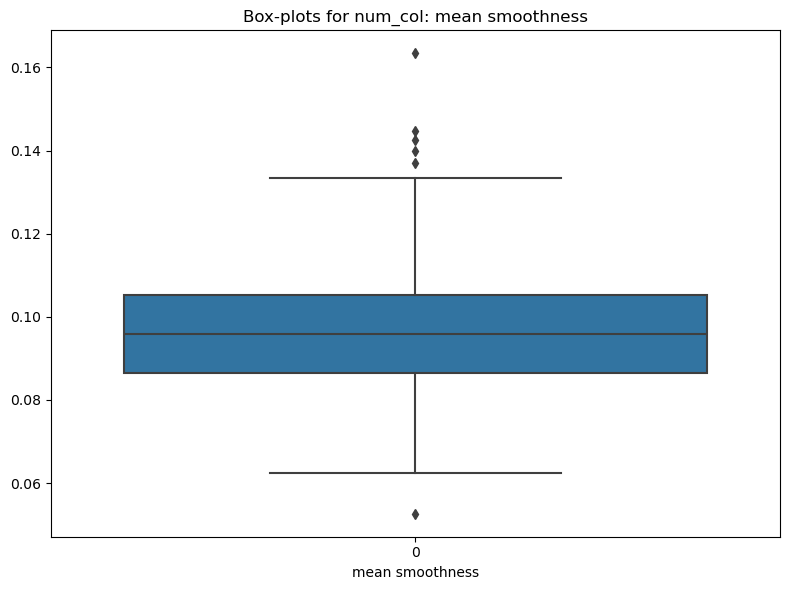

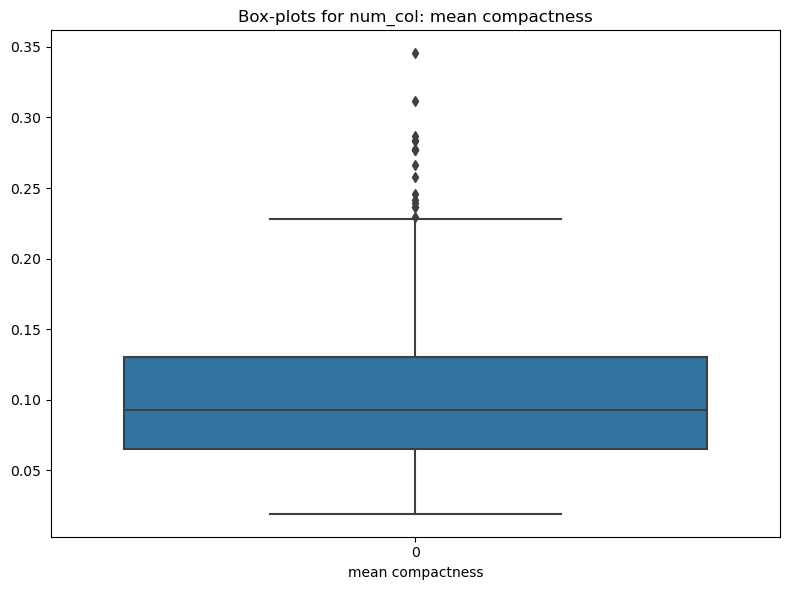

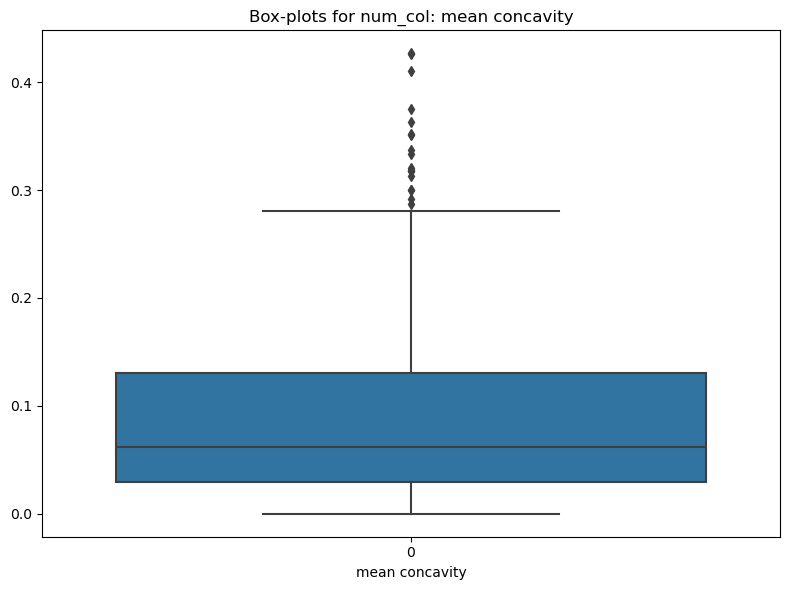

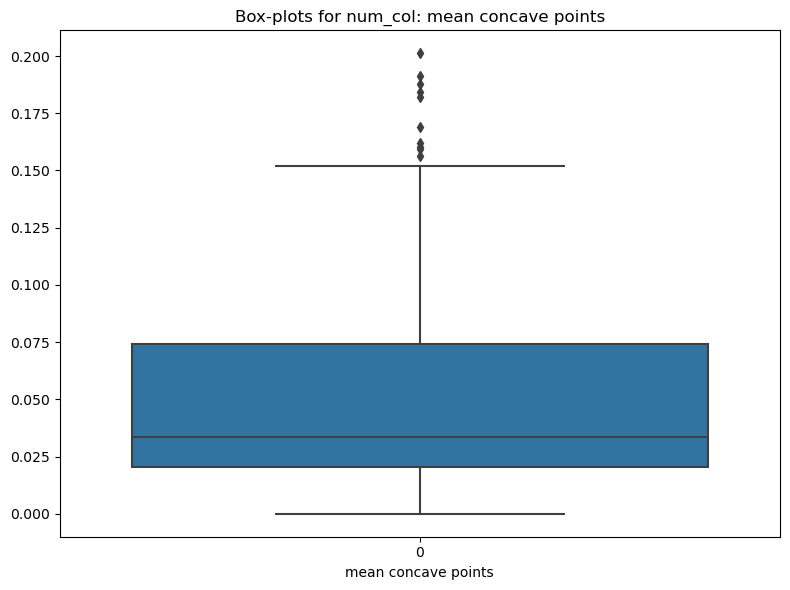

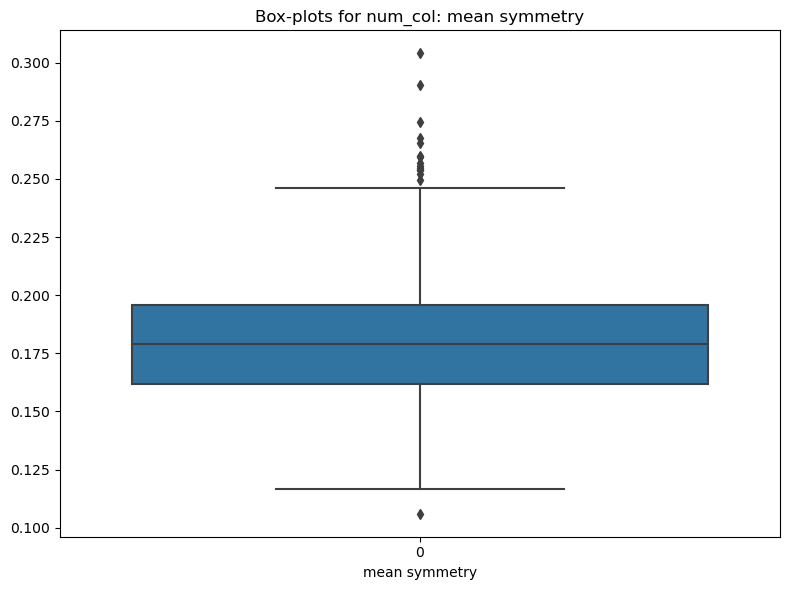

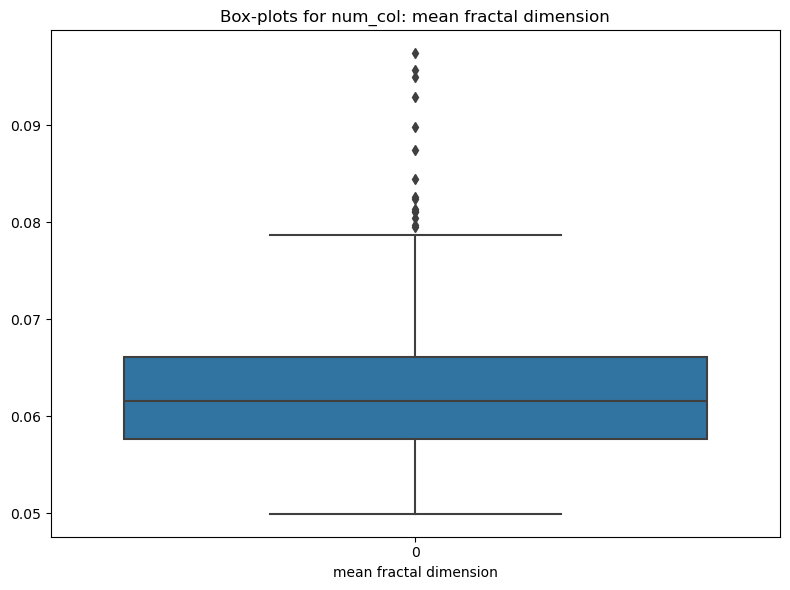

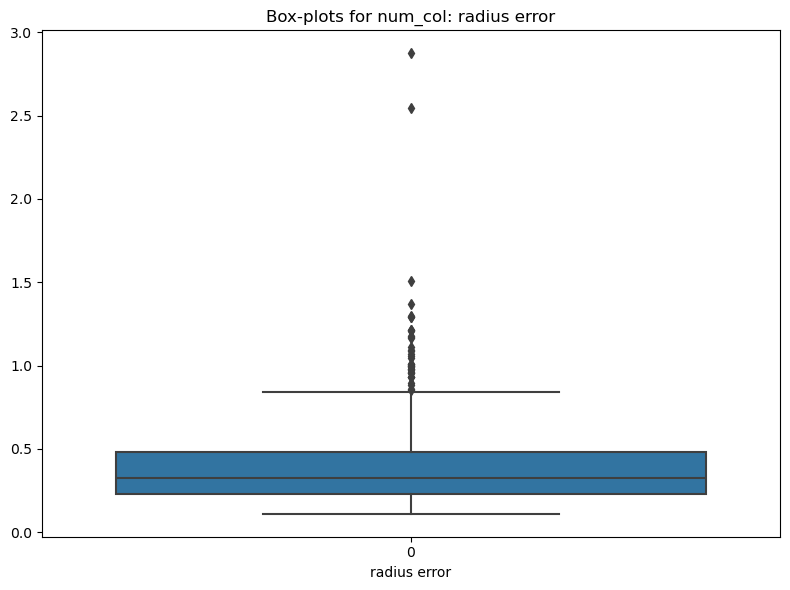

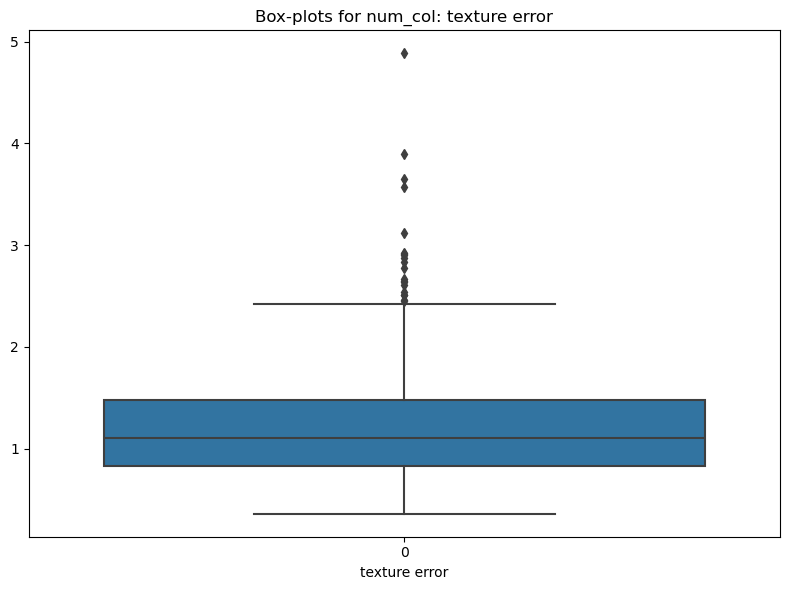

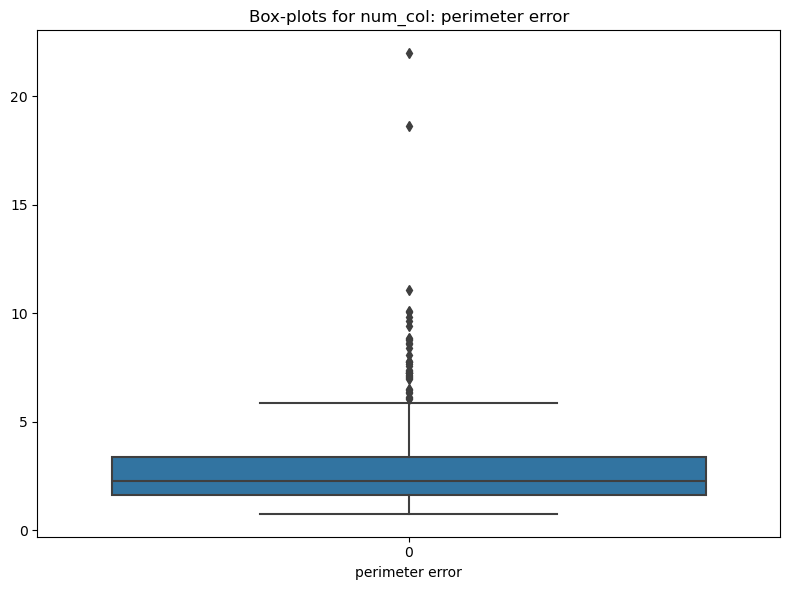

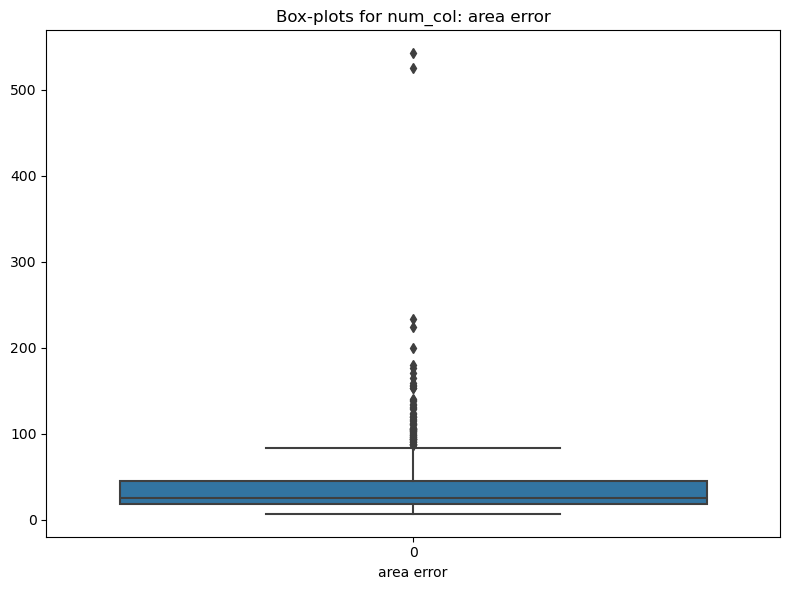

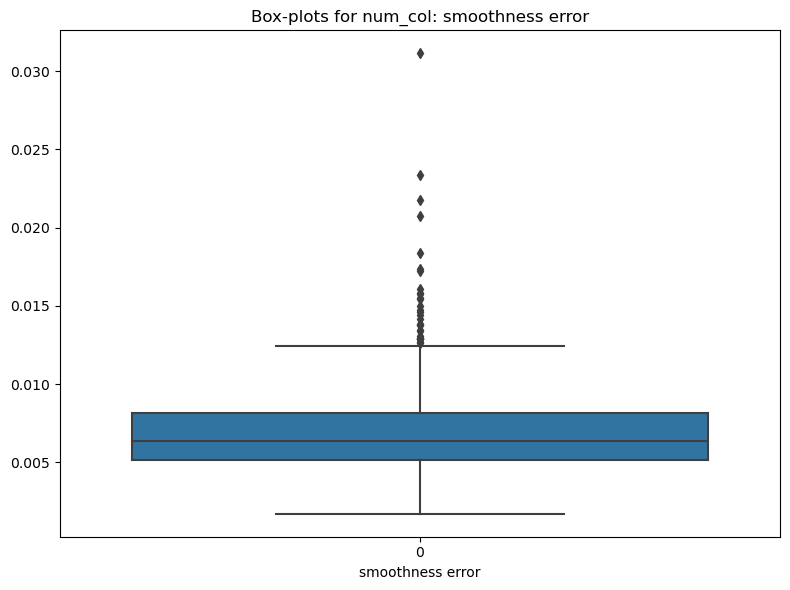

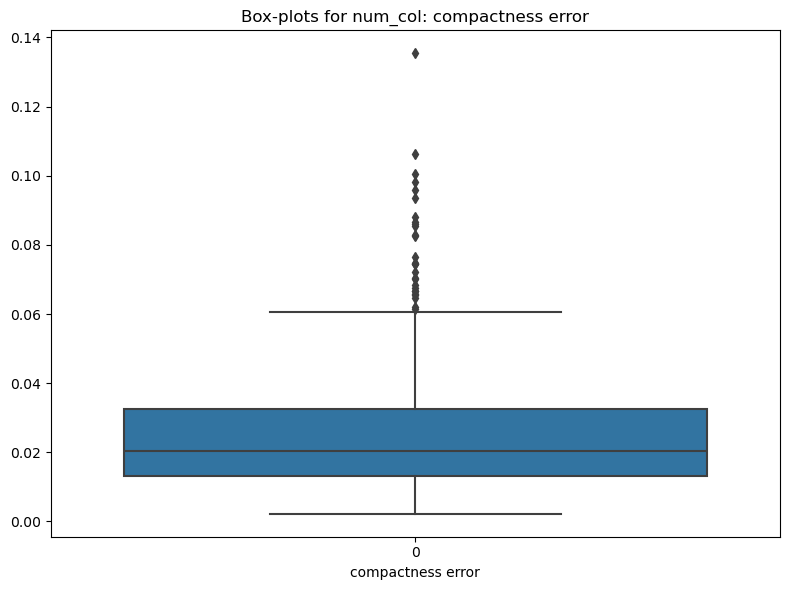

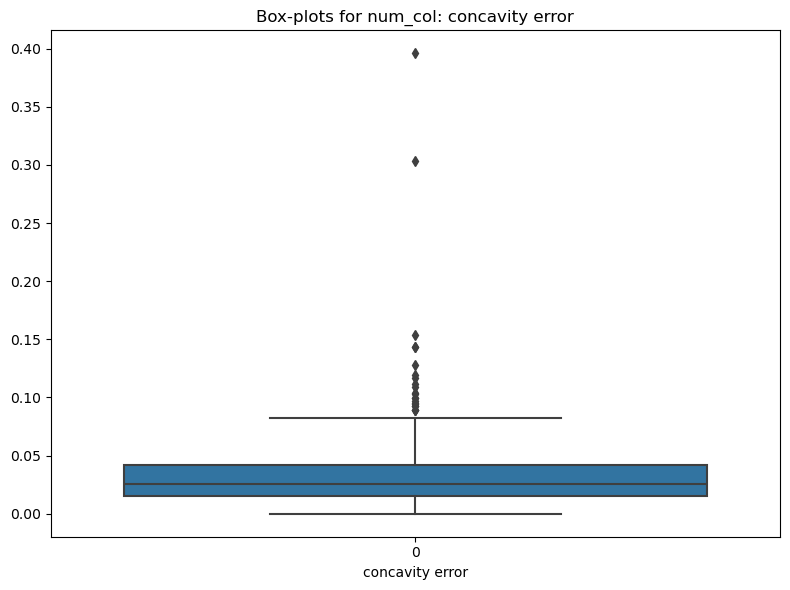

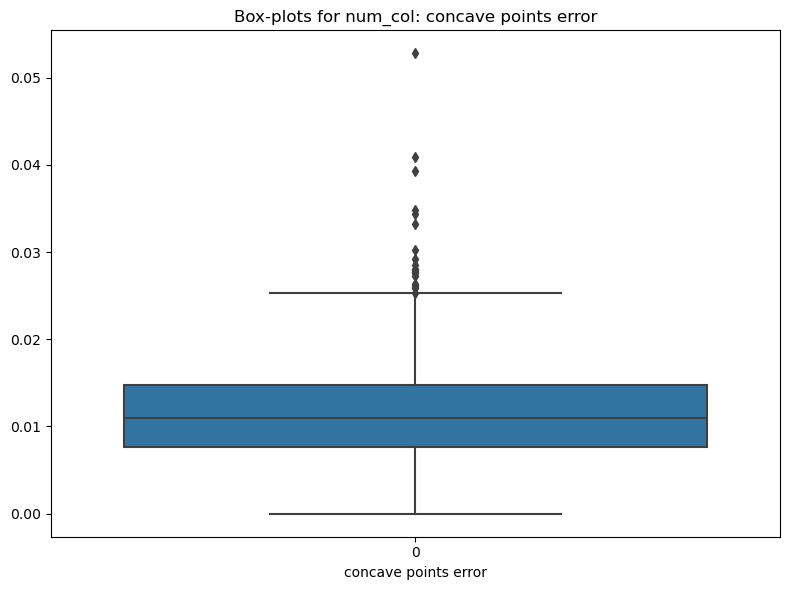

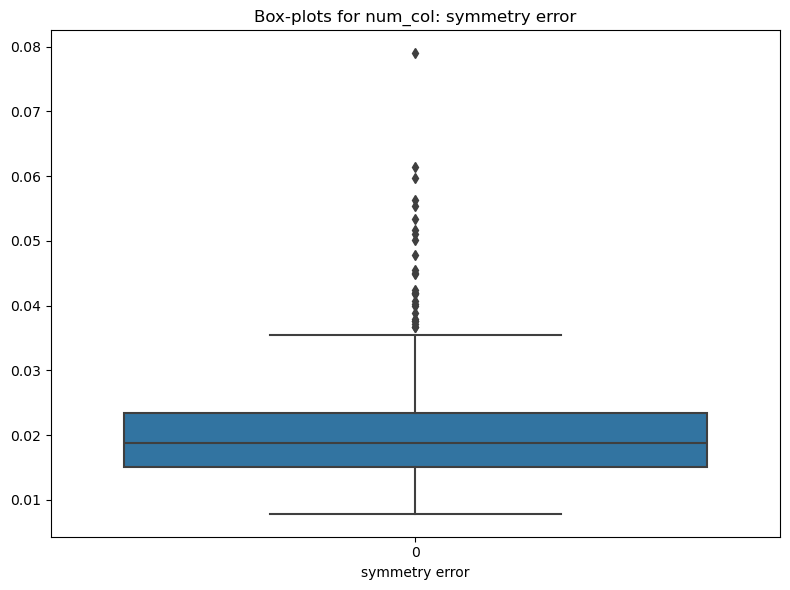

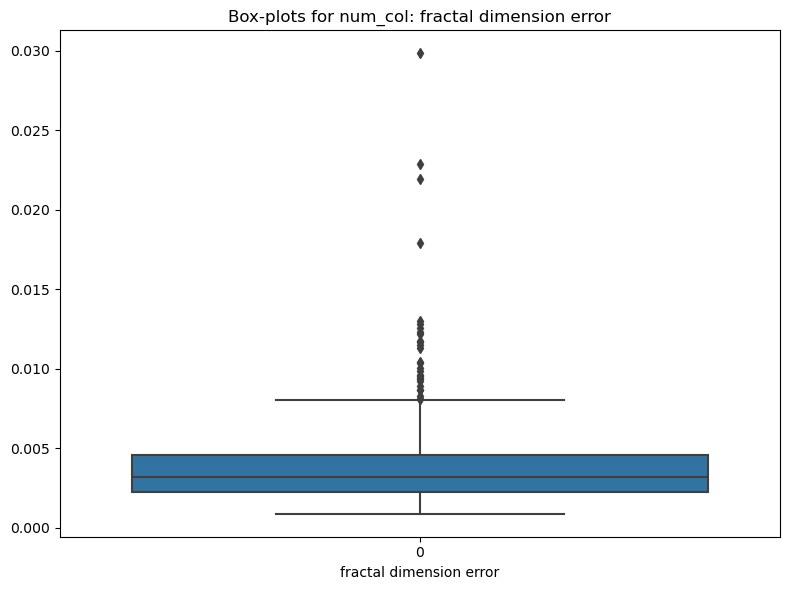

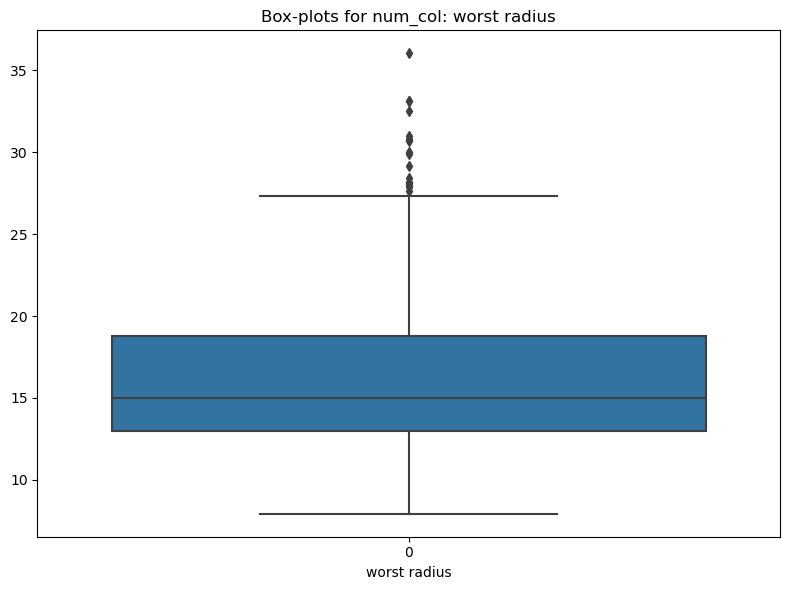

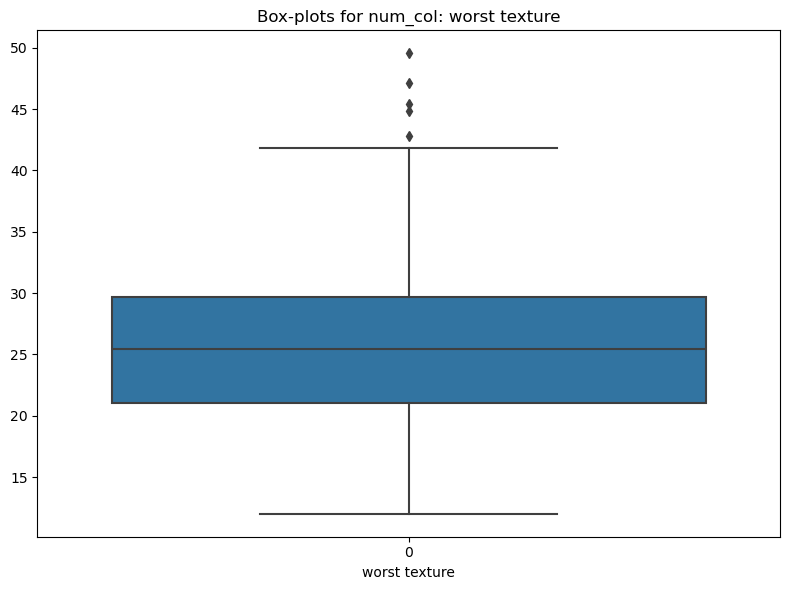

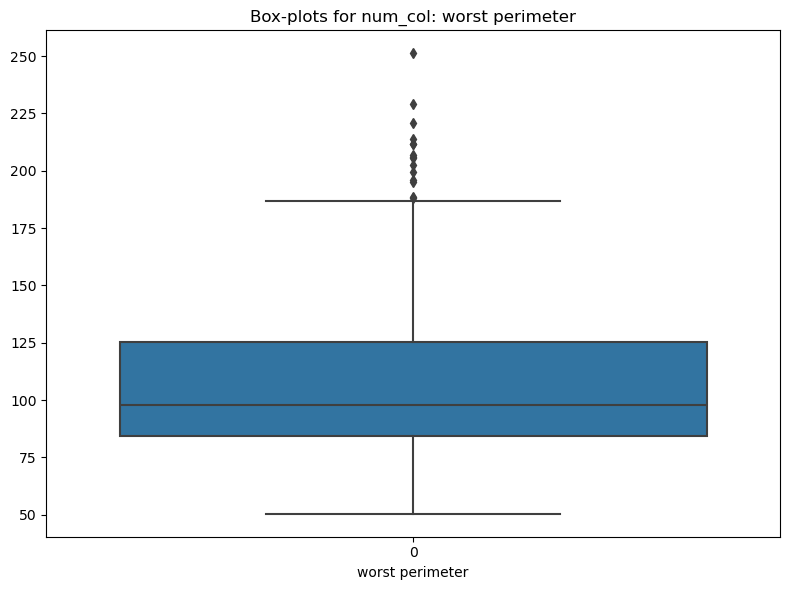

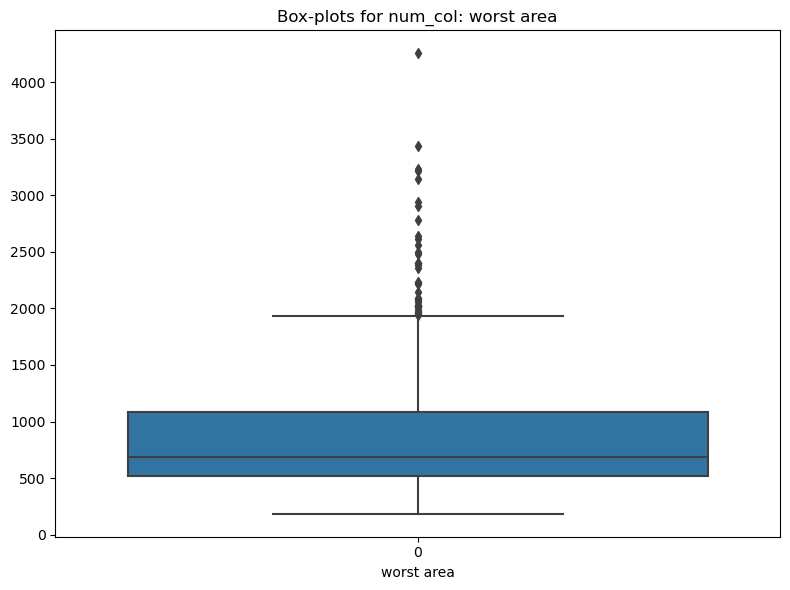

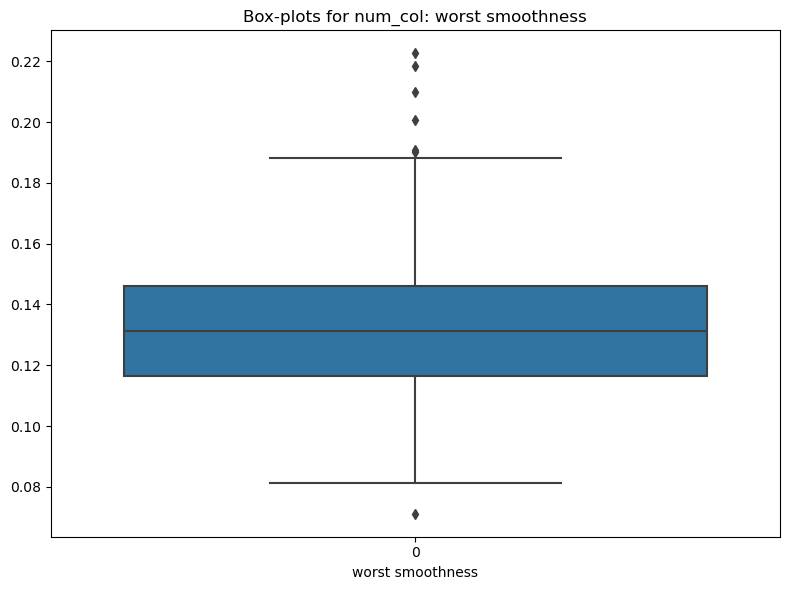

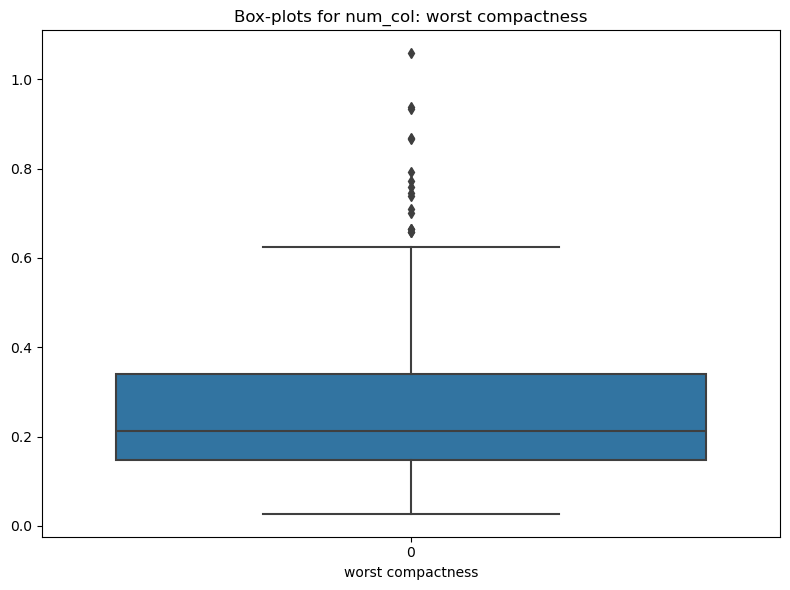

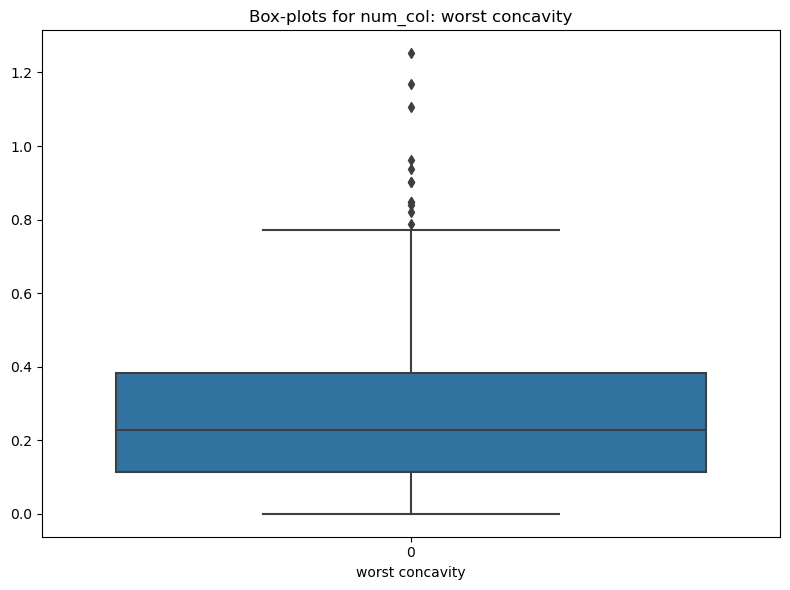

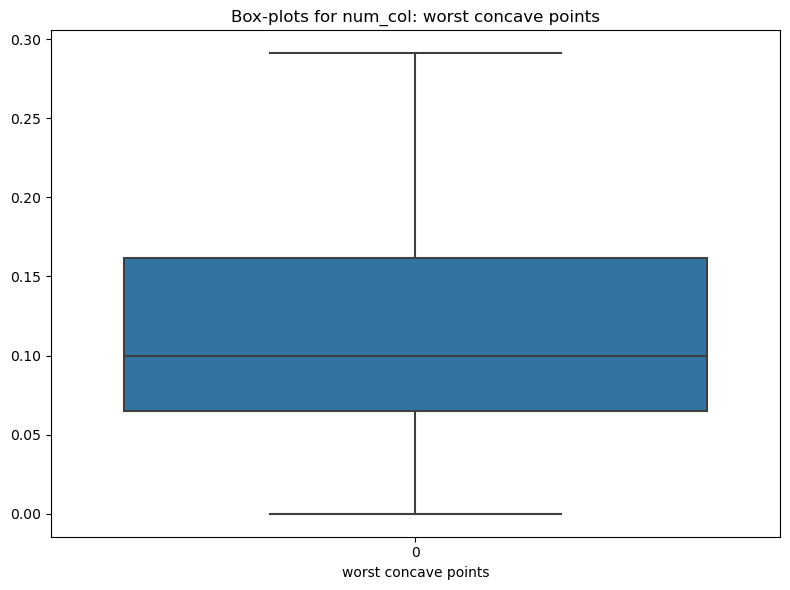

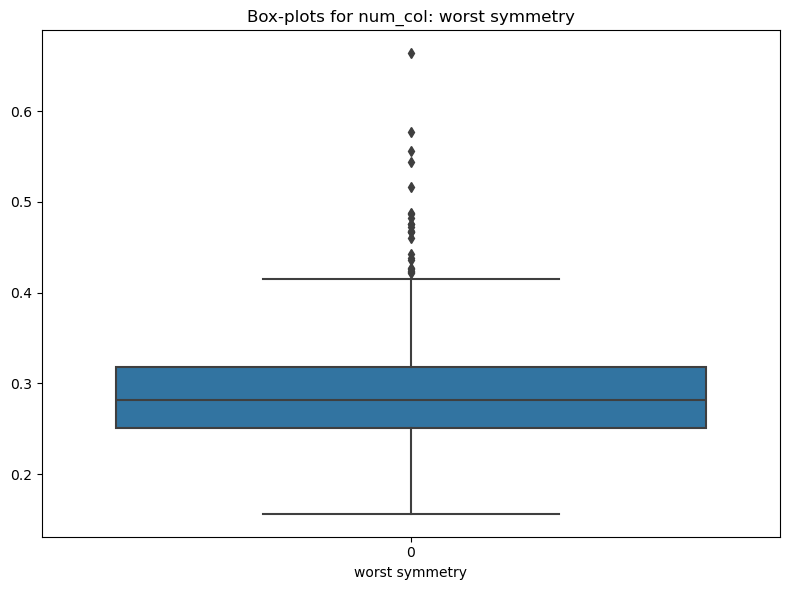

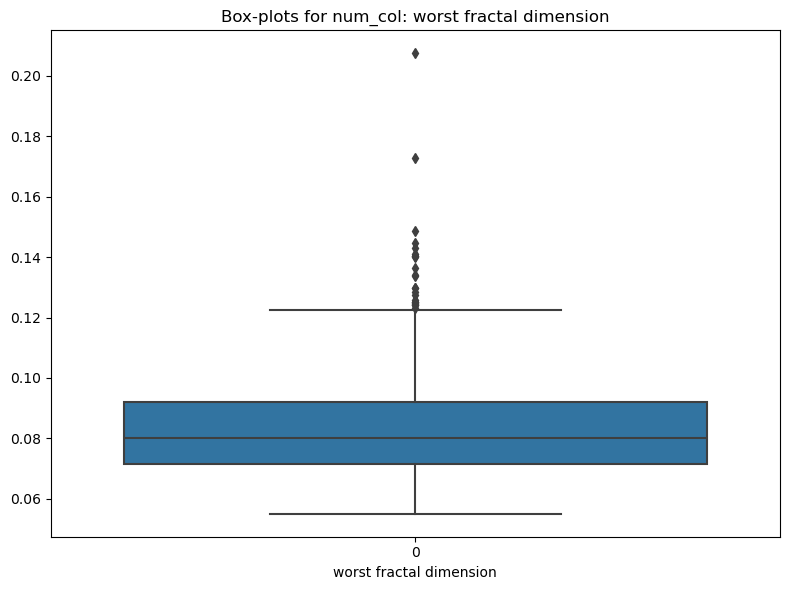

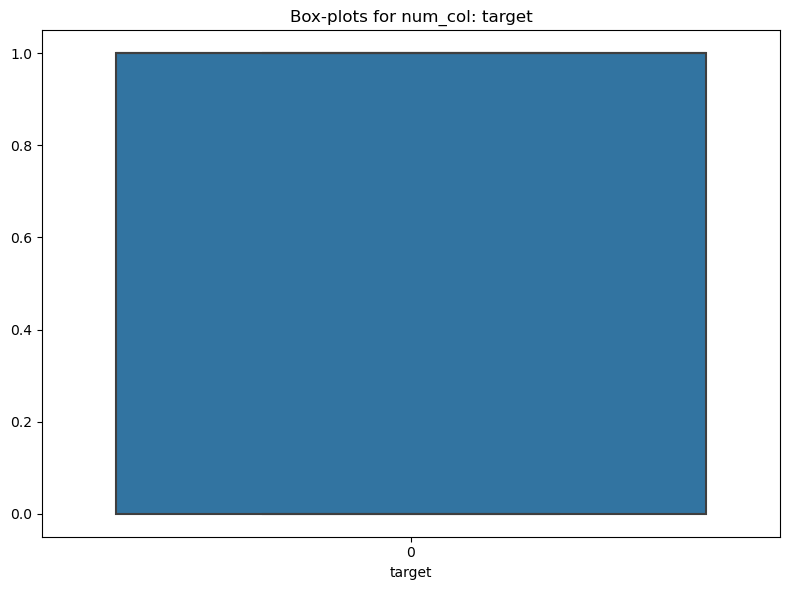

In [17]:
for i in num_col:
 plt.figure(figsize=(8,6))
 plt.title(f'Box-plots for num_col: {i}')
 sns.boxplot(data=df[i])
 plt.xlabel(f'{i}')
 plt.tight_layout()
 plt.show()
 

In [19]:
num_new_col=new_df.columns[new_df.dtypes!='object']

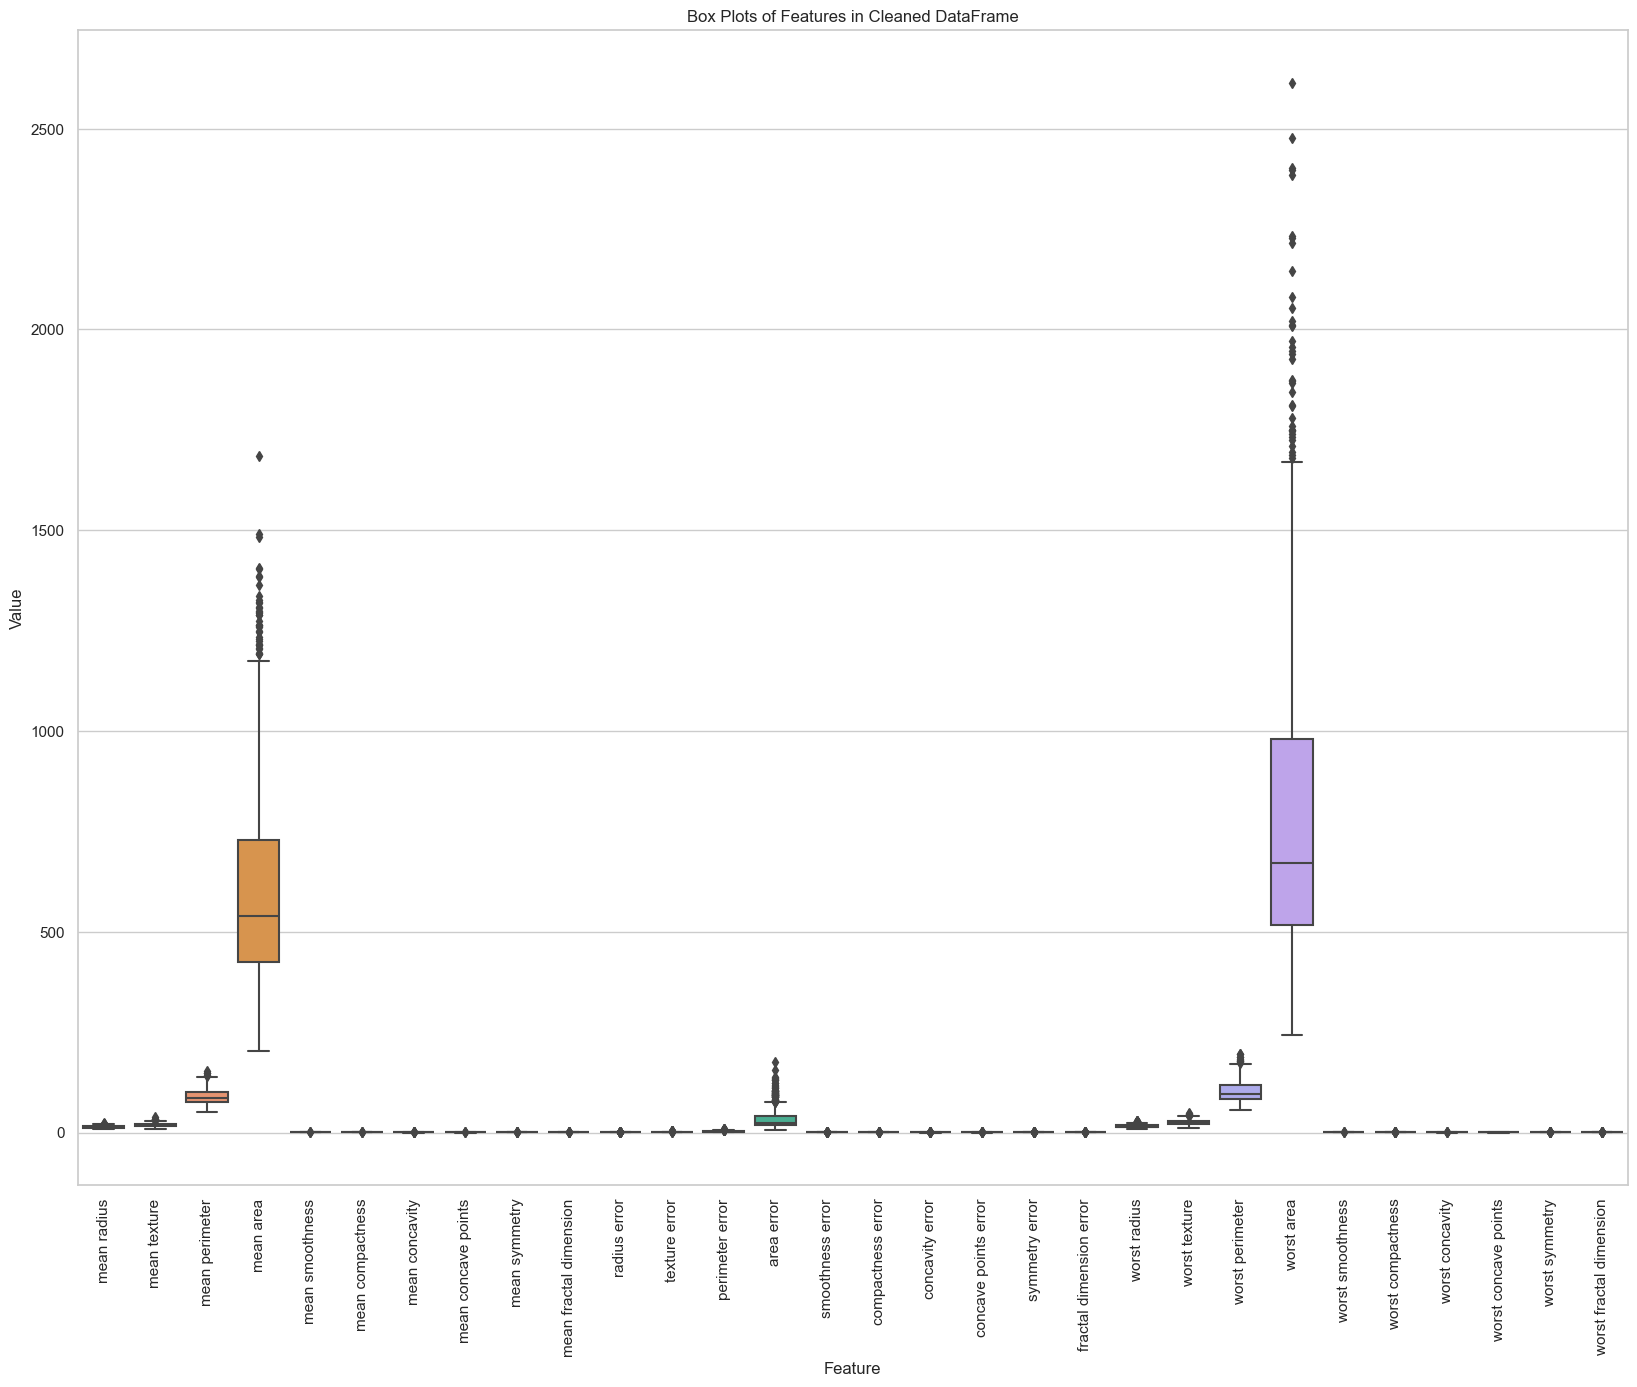

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a new DataFrame without the target column for box plotting
inliers_features = new_df.drop(columns='target')

# Plot box plots for each feature
plt.figure(figsize=(20, 15))

# Melt the DataFrame for better plotting with Seaborn
melted_df = inliers_features.melt(var_name='Feature', value_name='Value')

# Create the box plot
sns.boxplot(x='Feature', y='Value', data=melted_df)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)
plt.title('Box Plots of Features in Cleaned DataFrame')
plt.show()


Accuracy: 0.96
Precision: 0.95
Recall: 0.99

Confusion Matrix:
[[39  4]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



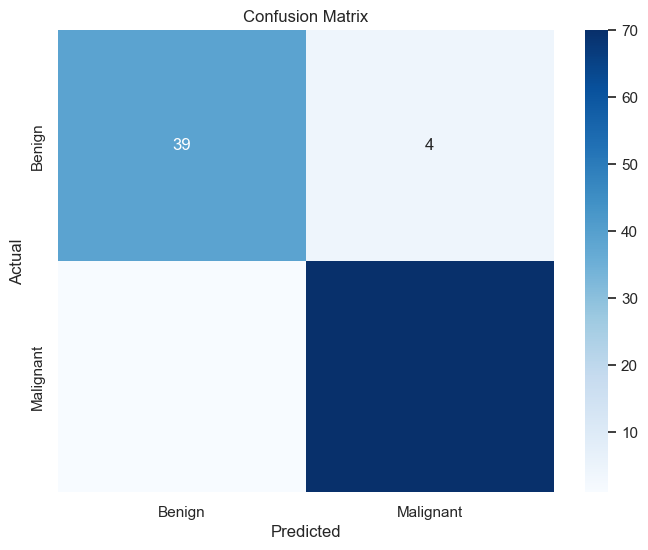

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Split the data into training and test sets
X = df.drop(columns='target')
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# # Optional: Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
